# Keras kitten


In [1]:
import os
import pydot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage\

%matplotlib inline

## Analyze data
Training-and test-dataset `train_catvnoncat` and `test_catvnoncat` is used in Coursera course [Neural Networks and Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) and provided by [deeplearning.ai cats vs non-cat dataset](https://www.floydhub.com/deeplearningai/datasets/cat-vs-noncat)

In [2]:
# Load dataset
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

train_set_y = train_set_y_orig
test_set_y = test_set_y_orig

y = [1], it's a 'cat' picture.
[b'non-cat' b'cat']
(209, 64, 64, 3)
72 cats of 209 images in training-set
33 cats of 50 images in test-set


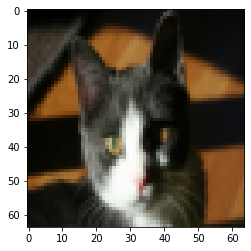

In [3]:
# Example of a picture
index = 19
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
train_set_x_orig[index].shape
print(classes)
print(train_set_x_orig.shape)
classes[np.squeeze(train_set_y[:, index])]
print(f"{train_set_y_orig[0,:].sum()} cats of {train_set_y_orig.shape[1]} images in training-set")
print(f"{test_set_y_orig[0,:].sum()} cats of {test_set_y_orig.shape[1]} images in test-set")

In [4]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
image_size = (64,64)
print(train_set_y.T[25])

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
[1]


# Prepare keras input datasets

In [5]:
image_size = (64, 64)
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_set_x_orig, train_set_y.T)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_set_x_orig, test_set_y.T)).batch(batch_size)

In [6]:
print(train_ds)

<BatchDataset shapes: ((None, 64, 64, 3), (None, 1)), types: (tf.uint8, tf.int64)>


# Prepare and print model

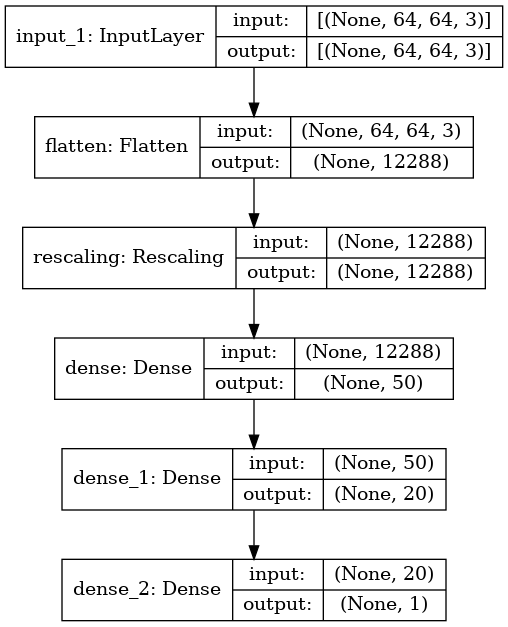

In [7]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    x = layers.Flatten(input_shape=(28, 28))(x)
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Dense(50, activation='relu')(x)
    x = layers.Dense(20, activation='relu')(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)
model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

# Train

In [8]:
from tqdm.keras import TqdmCallback
epochs = 200
alpha = 0.0075

callbacks = [
    TqdmCallback(verbose=2),
    keras.callbacks.ModelCheckpoint("checkpoint/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(alpha),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, 
    validation_data=test_ds, verbose=0,
)

0epoch [00:00, ?epoch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

  0%|          | 0.00/7.00 [00:00<?, ?batch/s]

# Predict on image

In [9]:
import imageio
from PIL import Image   
num_px = 64

In [10]:
def predict_image(my_image):
    img = keras.preprocessing.image.load_img(
        my_image, target_size=image_size
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    print(
        "This image is %.2f percent a cat." % (100 * score)
    )

In [11]:
def plot_image(my_image):
    num_px = 64
    newsize = (num_px, num_px)
    image_orig = np.array(imageio.imread(my_image))
    my_image_array_plot = np.array(Image.fromarray(image_orig).resize(newsize))
    assert(my_image_array_plot.shape == (num_px, num_px, 3))
    plt.imshow(my_image_array_plot)

This image is 99.04 percent a cat.


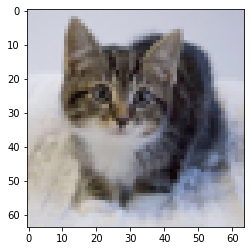

In [12]:
image="images/kitten.jpg"
plot_image(image)
predict_image(image)

But the model is still not working very well for unexpected cats:

This image is 60.22 percent a cat.


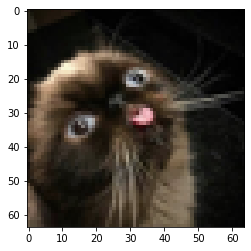

In [13]:
image="images/derp.jpg"
plot_image(image)
predict_image(image)

# The journey starts here
Accuracy on training-set is almost ~99% while test-set is ~70% -> high variance, model is overfitting
Consider:
- Add more or generate test-data (current dataset is very small for demonstration purposes)
- Regularization
- Another architecture (e.g. Convolutional neural networks)

After this, model might have bias (underfitting), things to consider to prevent bias:

- Use bigger network (more hidden layers, more nodes)
- Increase number of epochs
- Another architecture (e.g. Convolutional neural networks)

## Not done in this part

- Hyperparameter-tuning
- Assess F1 score, Precision/Recall etc.
